In [219]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy

""
from qcal.modelconstruction.single_qubit_models import *
from qcal.modelconstruction.experiment_design import *
from qcal.phase_estimation.analysis import *

import plotly.io as pio
pio.renderers.default = 'jupyterlab'

pd.set_option('display.max_columns', None)

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
def sum_counts(count_dict, outcomes_to_sum):
    return sum([count_dict[outcome] for outcome in outcomes_to_sum])

def extract_complex_signals(ds, edesign):
    signals = {}
    for idx, germ in enumerate(edesign.germs):
        germ_hash = edesign.germ_to_hash(germ)
        cos_plus_labels = edesign.cos_type_plus_outcome_labels[idx]
        cos_minus_labels = edesign.cos_type_minus_outcome_labels[idx]
        sin_plus_labels = edesign.sin_type_plus_outcome_labels[idx]
        sin_minus_labels = edesign.sin_type_minus_outcome_labels[idx]
        signals[germ_hash] = np.zeros(len(edesign.depths), dtype=np.complex128)
        for idx_d, d in enumerate(edesign.depths):
            cos_circ_at_depth = edesign.circuit_dict[germ_hash]['I'][d]
            cos_plus_counts_at_depth = sum_counts(ds[cos_circ_at_depth], cos_plus_labels)
            cos_minus_counts_at_depth = sum_counts(ds[cos_circ_at_depth], cos_minus_labels)
            sin_circ_at_depth = edesign.circuit_dict[germ_hash]['Q'][d]
            sin_plus_counts_at_depth = sum_counts(ds[sin_circ_at_depth], sin_plus_labels)
            sin_minus_counts_at_depth = sum_counts(ds[sin_circ_at_depth], sin_minus_labels)
            cos_prob = cos_plus_counts_at_depth/(cos_plus_counts_at_depth + cos_minus_counts_at_depth)
            sin_prob = sin_plus_counts_at_depth/(sin_plus_counts_at_depth + sin_minus_counts_at_depth)
            signal_at_depth = (1-2*cos_prob) + 1j*(1-2*sin_prob)
            signals[germ_hash][idx_d] = signal_at_depth
    return signals



In [221]:
def plot_complex_signal(signal, depths, germ_hash):
    # plot the real and imaginary part in the complex plane
    # signal is a numpy array of complex numbers
    # use a color map to indicate the depth
    plt.figure()
    plt.scatter(np.real(signal), np.imag(signal), c=depths, cmap='viridis')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.title(germ_hash)
    plt.colorbar()
    plt.show()
    
    

# Linear spacing 

In [222]:
depths = np.array([i+1 for i in range(100)])
edesign = EDesign_1QXZ(depths, 'Q0')

In [223]:
error_vec = np.array([0.01, 0.01, 0.01])
error_model = create_XZ_model_1q(error_vec)
target_model = create_XZ_model_1q(np.array([0.0, 0.0, 0.0]))

In [224]:
ds = edesign.make_dataset(error_model, 100)
analysis = Analysis_1QXZ(ds, edesign)
print(analysis)

Estimates: {'Gxpi2': array([4.69239165, 4.77210344, 4.75219862, 4.73730614, 4.73232271,
       4.67948972, 4.68418961, 4.73222089, 4.73001734, 4.71238898,
       4.71238898, 4.70243657, 4.70301649, 4.70657098, 4.70695884,
       4.69038621, 4.69087443, 4.69850128, 4.69999188, 4.6951112 ,
       4.69562497, 4.70413222, 4.70449121, 4.70400077, 4.7043363 ,
       4.70770273, 4.70778324, 4.70576941, 4.70586488, 4.70082026,
       4.70119344, 4.70457715, 4.70465618, 4.69926823, 4.70033169,
       4.70260997, 4.70230823, 4.70461422, 4.70481357, 4.70168238,
       4.7010805 , 4.70227393, 4.70309792, 4.69902528, 4.69909078,
       4.70394727, 4.70318881, 4.70051314, 4.7024124 , 4.70261193,
       4.70244587, 4.70168515, 4.70207221, 4.70317005, 4.70262697,
       4.7013131 , 4.70088555, 4.70320202, 4.70372405, 4.70240273,
       4.70256643, 4.70220042, 4.70236214, 4.70383332, 4.70396495,
       4.70306141, 4.70246697, 4.70167843, 4.70202533, 4.70239051,
       4.70288559, 4.70390668, 4.70295166

In [225]:
edesign.circuit_dict.keys()

dict_keys(['Gxpi2', 'Gxpi2.Gzpi2.Gzpi2.Gxpi2.Gzpi2.Gzpi2', 'Gxpi2.Gxpi2.Gzpi2.Gzpi2'])

In [226]:
extract_complex_signals(ds, edesign)

{'Gxpi2': array([-0.02+1.j  , -1.  +0.12j, -0.12-1.j  ,  1.  -0.1j ,  0.1 +1.j  ,
        -1.  -0.2j ,  0.2 -1.j  ,  1.  -0.16j,  0.16+1.j  , -1.  +0.j  ,
         0.  -1.j  ,  1.  +0.12j, -0.12+0.98j, -0.98-0.08j,  0.08-0.98j,
         0.98+0.36j, -0.36+0.94j, -0.94-0.24j,  0.24-1.j  ,  1.  +0.36j,
        -0.36+0.98j, -0.98-0.18j,  0.18-0.98j,  0.98+0.2j , -0.2 +0.98j,
        -0.98-0.12j,  0.12-0.96j,  0.96+0.18j, -0.18+0.94j, -0.94-0.34j,
         0.34-0.94j,  0.94+0.24j, -0.24+0.92j, -0.92-0.44j,  0.44-0.98j,
         0.98+0.36j, -0.36+0.92j, -0.92-0.28j,  0.28-0.92j,  0.92+0.42j,
        -0.42+0.84j, -0.84-0.38j,  0.38-0.9j ,  0.9 +0.6j , -0.6 +0.88j,
        -0.88-0.36j,  0.36-0.78j,  0.78+0.5j , -0.5 +0.94j, -0.94-0.5j ,
         0.5 -0.9j ,  0.9 +0.56j, -0.56+0.92j, -0.92-0.5j ,  0.5 -0.84j,
         0.84+0.6j , -0.6 +0.78j, -0.78-0.46j,  0.46-0.82j,  0.82+0.56j,
        -0.56+0.82j, -0.82-0.6j ,  0.6 -0.82j,  0.82+0.5j , -0.5 +0.82j,
        -0.82-0.58j,  0.58-0.74j,  0.74+0.

In [227]:
germ_hashs = [edesign.germ_hash(i) for i in range(len(edesign.germs))]
signals = extract_complex_signals(ds, edesign)
print(signals.keys())

dict_keys(['Gxpi2', 'Gxpi2.Gzpi2.Gzpi2.Gxpi2.Gzpi2.Gzpi2', 'Gxpi2.Gxpi2.Gzpi2.Gzpi2'])


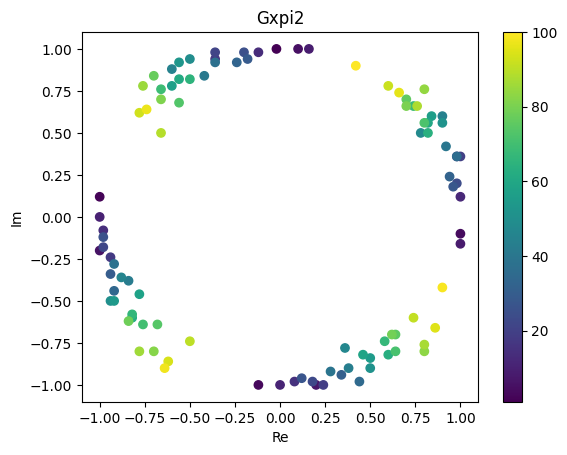

In [228]:
plot_complex_signal(signals[germ_hashs[0]], depths, germ_hashs[0])

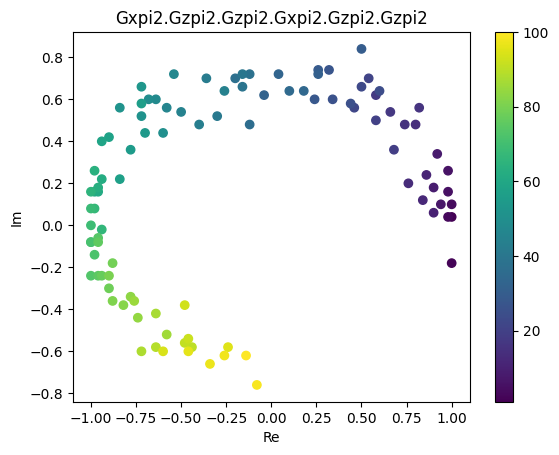

In [229]:
plot_complex_signal(signals[germ_hashs[1]], depths, germ_hashs[1])

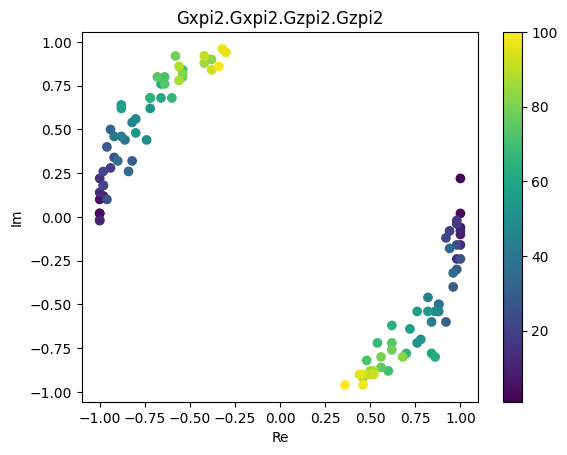

In [230]:
plot_complex_signal(signals[germ_hashs[2]], depths, germ_hashs[2])

In [322]:
def make_vandermont_vector(omega, depths, decay=0.0):
    return np.exp(-decay*depths - 1j*omega*depths)

def make_noise_subspace_matrix(signal, num_sources=1):
    cmat = np.outer(signal, np.conj(signal)) 
    evals, evecs = np.linalg.eig(cmat)
    # the noise subspace is the eigenvectors corresponding to all but the largest num_sources eigenvalues
    # remove the largest eigenvalue -- they are not sorted
    for i in range(num_sources):
        eval_norms = np.abs(evals)
        max_idx = np.argmax(eval_norms)
        # remove the max index
        evals = np.delete(evals, max_idx)
        evecs = np.delete(evecs, max_idx, axis=1)
    return evecs

def music_norm(vander_vec, noise_subspace):
    norm = 1/(vander_vec.conj().T @ noise_subspace @ noise_subspace.conj().T @ vander_vec)
    assert np.isclose(norm.imag, 0.0)
    return norm.real

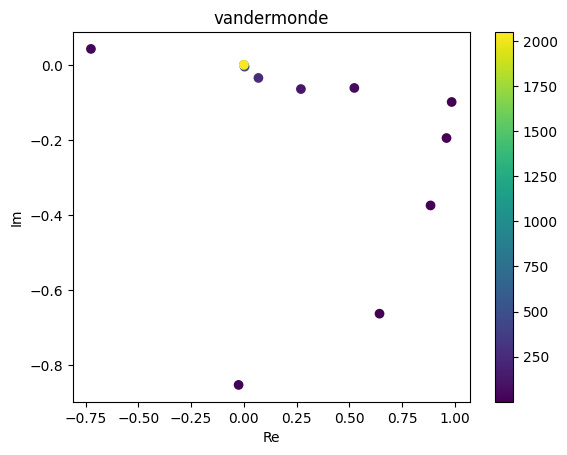

In [323]:
plot_complex_signal(make_vandermont_vector(0.1, depths, 0.01), depths, 'vandermonde')

In [324]:
def plot_music_norm(signal, depths, num_sources=1, decay=0.0, omega_range=(-np.pi, np.pi), resolution=100):
    omegas = np.linspace(omega_range[0], omega_range[1], resolution)
    noise_subspace = make_noise_subspace_matrix(signal, num_sources)
    music_norms = np.zeros(resolution)
    for idx, omega in enumerate(omegas):
        vander_vec = make_vandermont_vector(omega, depths, decay)
        music_norms[idx] = music_norm(vander_vec, noise_subspace)
    plt.figure()
    plt.plot(omegas, music_norms)
    plt.xlabel('omega')
    plt.ylabel('music_norm')
    plt.title('music norm')
    plt.show()
    
    

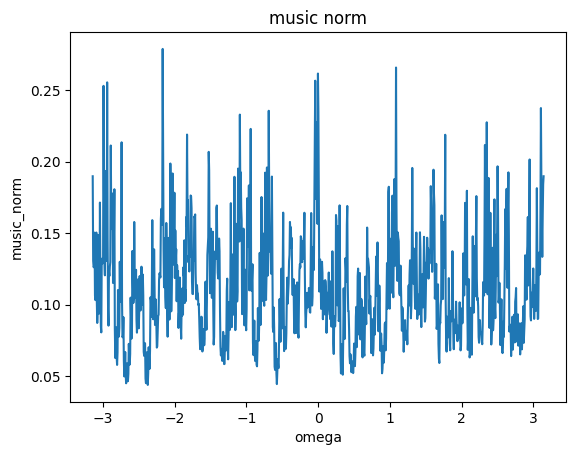

In [325]:
signal = make_vandermont_vector(1, depths, 0.00) + make_vandermont_vector(2, depths, 0.00)
plot_music_norm(signal, depths, num_sources=2, decay=0.0, omega_range=(-np.pi, np.pi), resolution=1000)

# logarithmic spacing

In [326]:
depths = np.array([2**i for i in range(12)])
edesign = EDesign_1QXZ(depths, 'Q0')

error_vec = np.array([0, 0, 0])
decay_rate = 0.0
error_model = create_XZ_model_1q(error_vec, gate_depol_rate=decay_rate)
target_model = create_XZ_model_1q(np.array([0.0, 0.0, 0.0]))


ds = edesign.make_dataset(error_model, 100)
analysis = Analysis_1QXZ(ds, edesign)
print(analysis)

Estimates: {'Gxpi2': array([4.67241029, 4.67247399, 4.69243148, 4.69500199, 4.71613449,
       4.7130139 , 4.71301365, 4.71393113, 4.71223281, 4.71211731,
       4.71258175, 4.71239874]), 'Gxpi2.Gzpi2.Gzpi2.Gxpi2.Gzpi2.Gzpi2': array([5.99281551e-02, 6.24327031e+00, 0.00000000e+00, 6.28068564e+00,
       2.49866795e-03, 3.11464539e-03, 1.55732270e-03, 6.28256164e+00,
       7.71076406e-04, 6.28310722e+00, 7.79589704e-05, 7.74683897e-05]), 'Gxpi2.Gxpi2.Gzpi2.Gzpi2': array([3.02216373, 3.161582  , 3.15657469, 3.14658999, 3.13536336,
       3.13847801, 3.13911367, 3.14313481, 3.14198198, 3.1417097 ,
       3.14170928, 3.14163163])},
 Last Good Index: {'Gxpi2': 11, 'Gxpi2.Gzpi2.Gzpi2.Gxpi2.Gzpi2.Gzpi2': 11, 'Gxpi2.Gxpi2.Gzpi2.Gzpi2': 11}


In [327]:
signals = extract_complex_signals(ds, edesign)

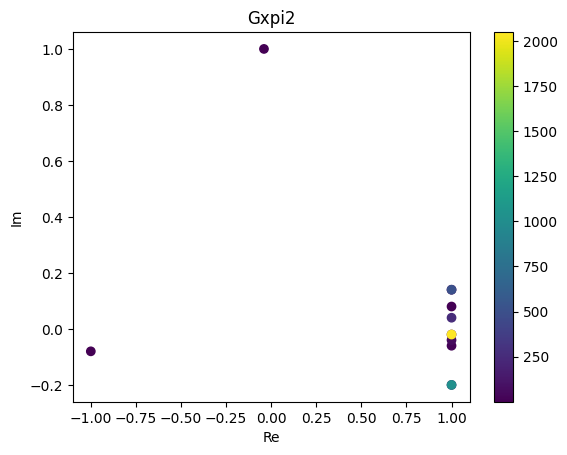

<Figure size 640x480 with 0 Axes>

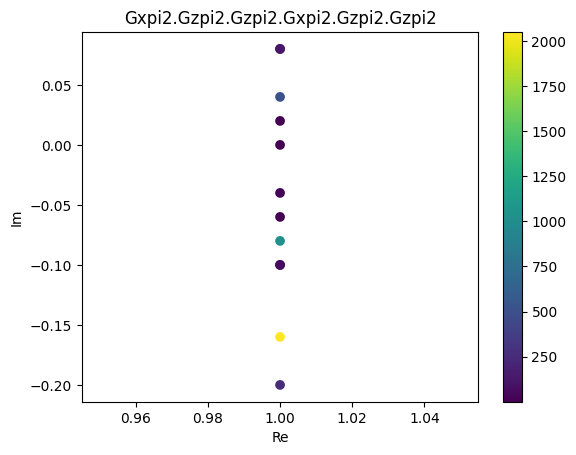

<Figure size 640x480 with 0 Axes>

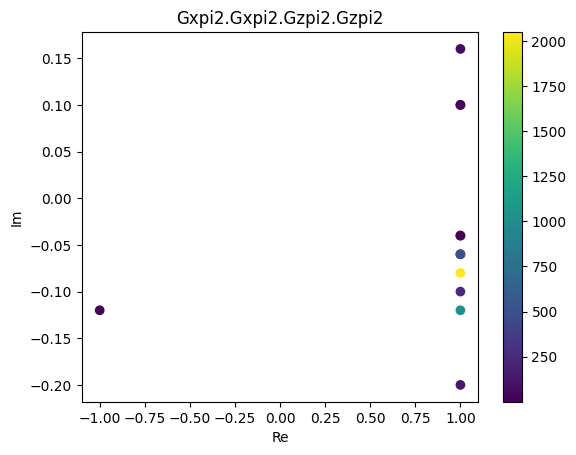

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [328]:
plot_complex_signal(signals[germ_hashs[0]], depths, germ_hashs[0])
plt.figure()
plot_complex_signal(signals[germ_hashs[1]], depths, germ_hashs[1])
plt.figure()
plot_complex_signal(signals[germ_hashs[2]], depths, germ_hashs[2])
plt.figure()

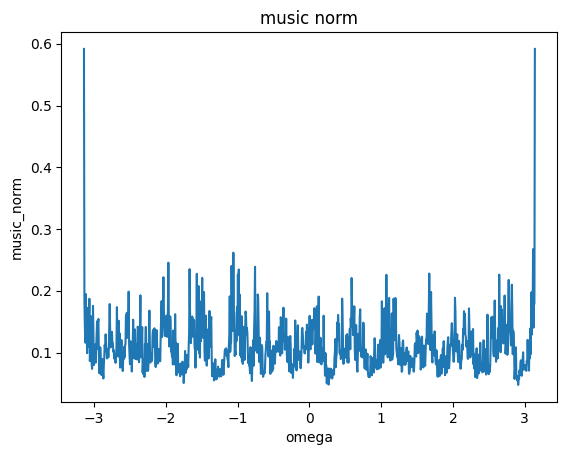

In [329]:
plot_music_norm(signals[germ_hashs[0]], depths, num_sources=2, decay=0.0, omega_range=(-np.pi, np.pi), resolution=1000)

In [330]:
def plot_music_norm_series(signal, depths, num_sources=1, decay=0.0, omega_range=(-np.pi, np.pi), resolution=1000):
    # plot a series of music norms for each subsignal from max_depth starting at max_depth_idx = 3
    starting_max_depth_idx = 3
    num_plots = len(depths) - starting_max_depth_idx

    fig, axs = plt.subplots(num_plots, figsize=(10, 5*num_plots))
    

    omegas = np.linspace(omega_range[0], omega_range[1], resolution)
    
    for d in range(starting_max_depth_idx, len(depths)):
        noise_subspace = make_noise_subspace_matrix(signal[:d], num_sources)
        music_norms = np.zeros(resolution)
        for idx, omega in enumerate(omegas):
            vander_vec = make_vandermont_vector(omega, depths[:d], decay)
            music_norms[idx] = music_norm(vander_vec, noise_subspace)
        axs[d-starting_max_depth_idx].plot(omegas, music_norms)
        axs[d-starting_max_depth_idx].set_xlabel('omega')
        axs[d-starting_max_depth_idx].set_ylabel('music_norm')
        axs[d-starting_max_depth_idx].set_title('music norm, max_depth = {}'.format(depths[d]))
    plt.tight_layout()
    plt.show()


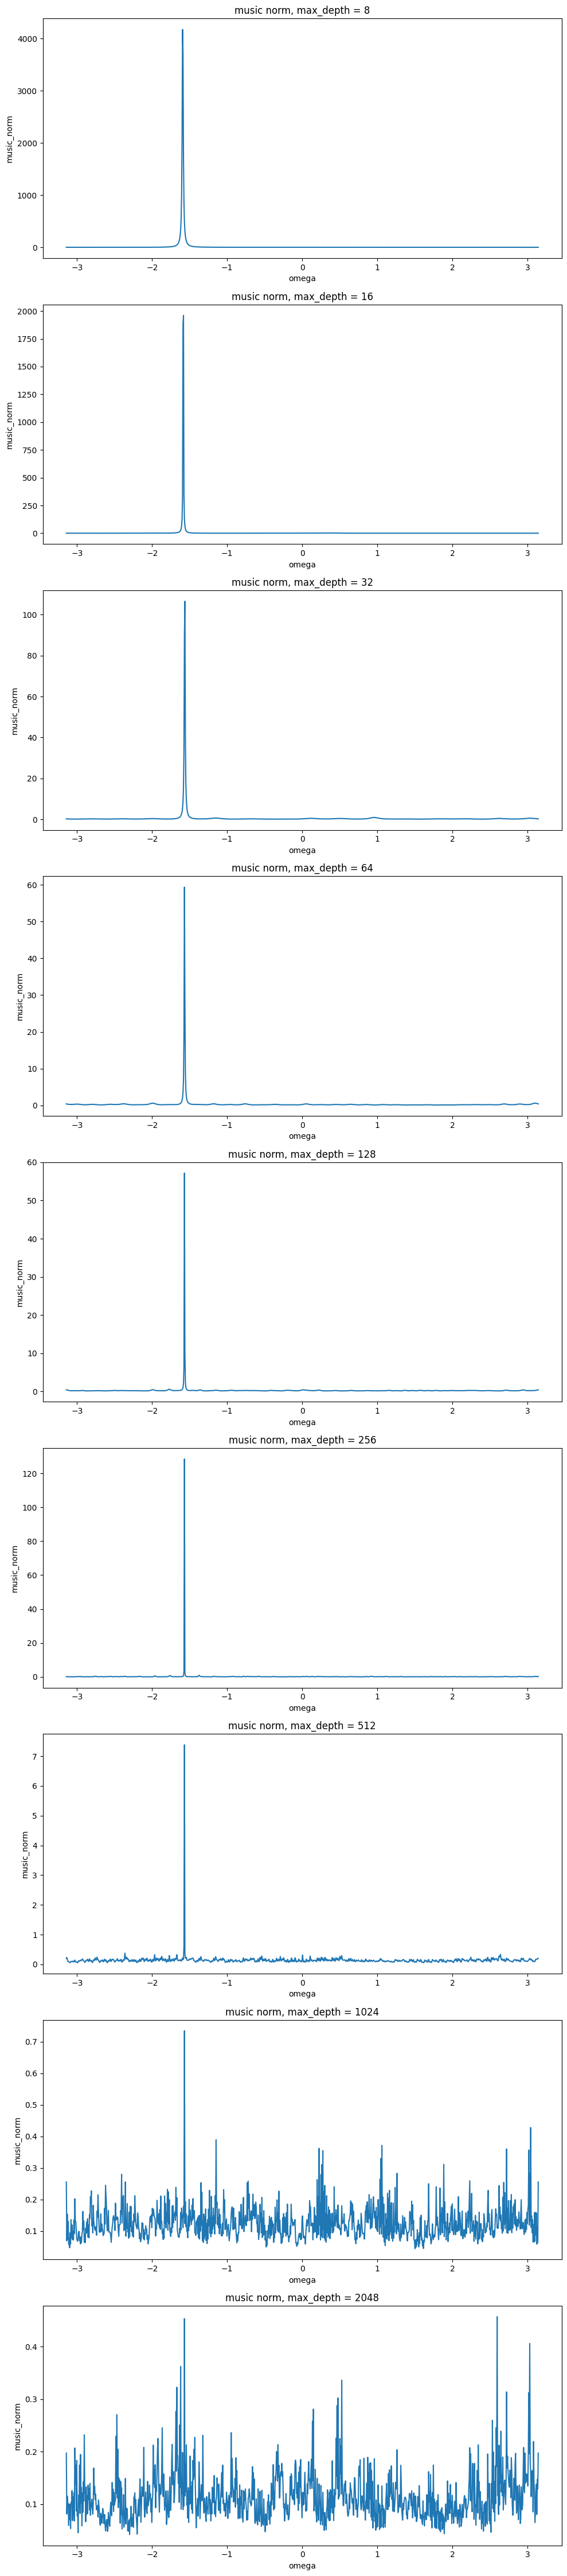

In [331]:
plot_music_norm_series(signals[germ_hashs[0]], depths, num_sources=1, decay=0.0, omega_range=(-np.pi, np.pi), resolution=1000)